In [ ]:
# set up our model
import tensorflow as tf

# x_train is our images
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# this normalizes our picture
x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)

# relu (rectified linear unit) is f(x) = 0 for x < 0 and f(x) = x for x >= 0
# softmax function transforms our vector of real values into a vector of real values that sum to 1 (so we can use them as probabilities)
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten()) # our input layer
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu)) # first hidden layer
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu)) # second hidden layer
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax)) # output layer, 10 is how many possibilities there are (0-9 in our case)

model.compile(optimizer='Adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train, epochs=3)

In [11]:
val_loss, val_acc = model.evaluate(x_test, y_test)
print(val_loss, val_acc)
# expected to be slightly different from what you get from above (loss higher, accuracy lower) but you don't want it to be too close or too far

313/313 [==============================] - 0s 1ms/step - loss: 0.0916 - accuracy: 0.9727
0.09160637110471725 0.9726999998092651


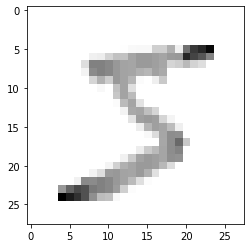

In [4]:
# show some of our training data
import matplotlib.pyplot as plt
plt.imshow(x_train[0], cmap=plt.cm.binary)
plt.show()

In [14]:
# save our model as 'num_reader.model'
model.save('num_reader.model')

INFO:tensorflow:Assets written to: num_reader.model\assets


In [15]:
# load our model
new_model = tf.keras.models.load_model('num_reader.model')

In [16]:
# predict an image
predictions = new_model.predict(x_test)

In [17]:
# these are one-hot arrays
print(predictions)

[[6.93362534e-10 8.23300127e-07 3.06273751e-06 ... 9.99976993e-01
  1.13917240e-08 1.74490125e-07]
 [1.31375719e-08 1.77035672e-05 9.99978423e-01 ... 2.27837735e-10
  9.99284637e-08 1.76194793e-13]
 [2.12345076e-05 9.98956203e-01 1.71323481e-04 ... 2.71798839e-04
  2.40721216e-04 1.79321887e-05]
 ...
 [2.02319725e-08 4.60636556e-07 8.35960137e-08 ... 4.13263569e-06
  1.11862446e-05 7.14187918e-04]
 [1.79738237e-07 5.02853652e-08 1.29488143e-07 ... 1.07074186e-07
  7.44990102e-05 5.60081592e-10]
 [1.61505341e-07 1.64023106e-06 5.70186330e-07 ... 1.24867658e-10
  3.72671174e-08 2.33868775e-11]]


In [18]:
# we can use numpy to get the above into something a bit more readable
import numpy as np
print(np.argmax(predictions[0]))

7


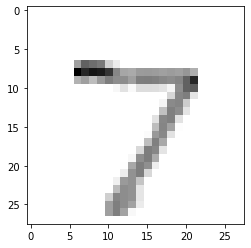

In [20]:
# lets verify that the image is 7
plt.imshow(x_test[0], cmap=plt.cm.binary)
plt.show()

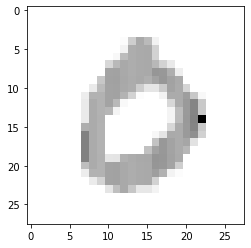

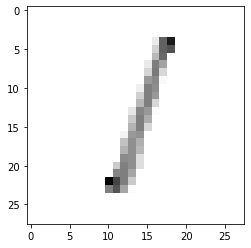

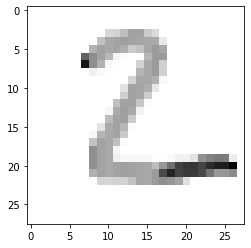

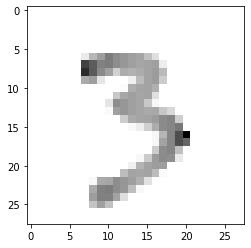

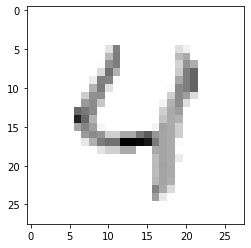

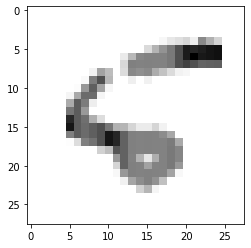

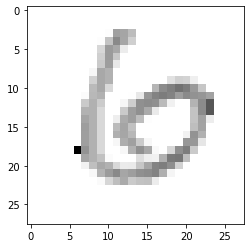

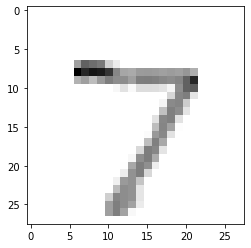

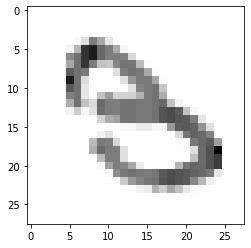

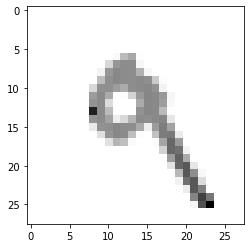

In [27]:
# lets see some examples of numbers 0-9
num = 0
while num < 10:
    for i, p in enumerate(predictions):
        if np.argmax(p) == num:
            plt.imshow(x_test[i], cmap=plt.cm.binary)
            plt.show()
            num += 1
            break


In [76]:
# now lets make some of our own pictures and see if our model can recognize them
file_names = ['four1.png', 'two1.png', 'zero1.png', 'four2.png', 'two2.png', 'zero2.png']
new_predictions = []
for fname in file_names:
    img = tf.keras.preprocessing.image.load_img(fname, color_mode='grayscale')
    x = tf.keras.preprocessing.image.img_to_array(img)
    x = tf.image.resize(x, (28,28), antialias=True)
    x = tf.keras.utils.normalize(x, axis=1)
    prediction = new_model.predict(x)
    print(np.argmax(prediction))

4
2
0
4
2
0


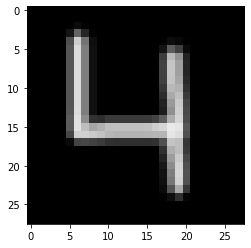

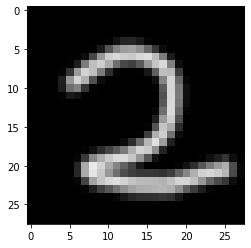

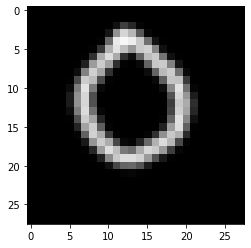

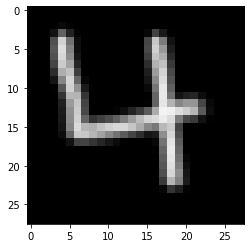

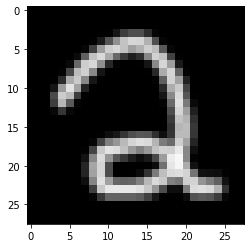

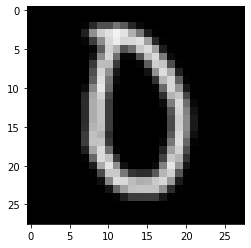

In [77]:
# now lets compare our output to our pictures above to check if its correct
import matplotlib.image as mpimg

for fname in file_names:
    image = mpimg.imread(fname)
    plt.imshow(image)
    plt.show()

In [ ]:
# as you can see our number outputs match the pictures
# these pictures were made in paint, however if you draw on paper and pencil and try and have the model predict that it will likely fail  
# some properties you need to apply (preprocess) in most cases:
# 1. white numbers, black background
# 2. 28x28 bounding box, but the number is normalized to fix in a 20x20 box
# 3. Centered by center of mass
# in our case since our examples comply to #1, and somewhat comply to #2 and #3 our model can recognize them
# however it still might have trouble since we did not actually apply any preprocessing